# Peters Images using yolov10
https://blog.roboflow.com/yolov10-how-to-train/?utm_campaign=Newsletter+-+6%2F6%2F2024+-+%5Byolov10%5D&utm_content=Newsletter+-+6%2F6%2F2024+-+%5Byolov10%5D&utm_medium=email_action&utm_source=email

These are hte classes, 0 indexed:
```
0="person"
1="bicycle"
"car"
"motorcycle"
"airplane"
"bus"
"train"
"truck"
"boat"
"traffic light"
"fire hydrant",
"stop sign"
"parking meter"
"bench"
"bird"
"cat"
16="dog"
"horse"
18="sheep"
19="cow"
"elephant"
"bear"
"zebra",
"giraffe"
"backpack"
"umbrella"
"handbag"
"tie"
"suitcase"
"frisbee"
"skis"
"snowboard"
"sports ball"
"kite",
"baseball bat"
"baseball glove"
"skateboard"
"surfboard"
"tennis racket"
"bottle"
"wine glass"
"cup"
"fork"
"knife",
"spoon"
"bowl"
"banana"
"apple"
"sandwich"
"orange"
"broccoli"
"carrot"
"hot dog"
"pizza"
"donut"
"cake"
"chair",
"couch"
"potted plant"
"bed"
"dining table"
"toilet"
"tv"
"laptop"
"mouse"
"remote"
"keyboard"
"cell phone",
"microwave"
"oven"
"toaster"
"sink"
"refrigerator"
"book"
"clock"
"vase"
"scissors"
"teddy bear"
"hair drier"
"toothbrush"
```

In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.1 MB/s eta 0:00:00


In [7]:
import os
HOME = os.getcwd()

!mkdir -p {HOME}/weights
#!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
#!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
#!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
#!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
#!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 100M
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt


In [8]:
from ultralytics import YOLOv10
import os

model = YOLOv10(f'{HOME}/weights/yolov10l.pt')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/Colab\ Notebooks/cow_dog_test100

Mounted at /content/drive
3NVRIKIYGO3N.JPG			    IMG_01582.JPG
8BGQOJHUC978.JPG			    IMG_01897.JPG
9DBJN38HDRAM.JPG			    IMG_01965.JPG
Afghan_hound_00093gry.JPG		    IMG_02219.JPG
Airedale_terrier_00199.JPG		    IMG_02598.JPG
American_eskimo_dog_00401.JPG		    IMG_02769.JPG
American_eskimo_dog_00433.JPG		    IMG_03326.JPG
Anatolian_shepherd_dog_00695.JPG	    IMG_03463.JPG
Anatolian_shepherd_dog_00713.JPG	    IMG_03499.JPG
Australian_cattle_dog_00797.JPG		    IMG_03870.JPG
Basenji_00962.JPG			    IMG_04180.JPG
Beagle_01155.JPG			    IMG_0563.JPG
Beagle_01174.JPG			    IMG_1157.JPG
Bedlington_terrier_01387.JPG		    IMG_2019.JPG
Bedlington_terrier_01390.JPG		    IMG_2164.JPG
Belgian_malinois_01475.JPG		    IMG_2364.JPG
Belgian_sheepdog_01545.JPG		    IMG_2611.JPG
Bernese_mountain_dog_01640.JPG		    IMG_2735.JPG
Bloodhound_01879.JPG			    IMG_4117.JPG
Briard_02518gry.JPG			    IMG_4231.JPG
Brussels_griffon_02664.JPG		    IMG_4965.JPG
Brussels_griffon_02716.JPG		    IMG_5012.JPG
Bull_terr

In [13]:
results = model(source='/content/drive/MyDrive/Colab Notebooks/cow_dog_test100/IMG_01420.JPG', conf=0.25)
print(results[0].boxes.xyxy)


image 1/1 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/IMG_01420.JPG: 384x640 4 18s, 139.0ms
Speed: 15.9ms preprocess, 139.0ms inference, 400.0ms postprocess per image at shape (1, 3, 384, 640)
tensor([[1479.8875,  446.6326, 1669.5984,  623.1154],
        [1713.0897,  629.4299, 1904.5118,  772.6068],
        [1388.1488,  511.1562, 1460.2865,  661.2305],
        [1000.1995,  101.6085, 1079.7335,  200.0115]], device='cuda:0')


In [14]:
!pip install supervision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 4.4 MB/s eta 0:00:00


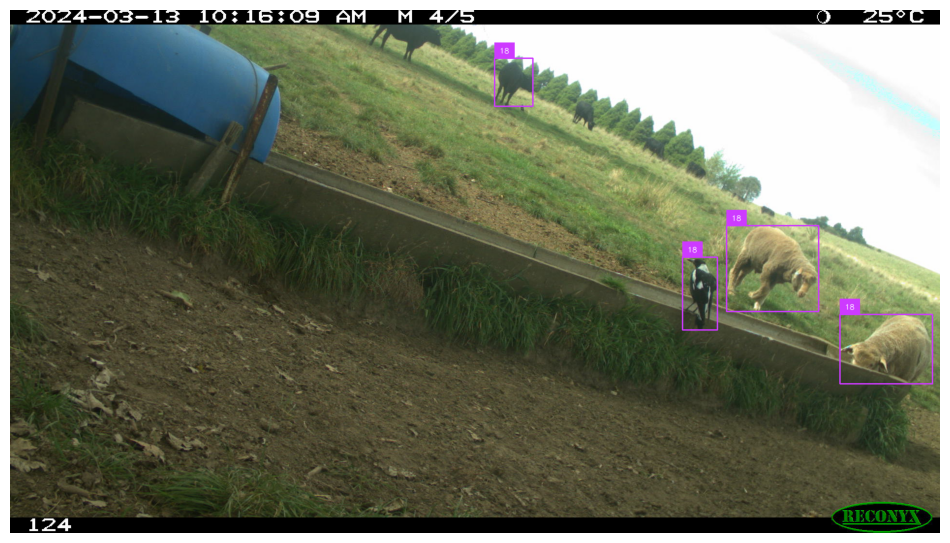

In [17]:
import cv2
import supervision as sv

# Extract the Results object from the list
results_object = results[0]

detections = sv.Detections.from_ultralytics(results_object)  # Pass the Results object

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/cow_dog_test100/IMG_01420.JPG')


# Assuming 'image' is defined somewhere earlier in your code
annotated_image = bounding_box_annotator.annotate(
	scene=image, detections=detections)
annotated_image = label_annotator.annotate(
	scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [25]:
!yolo predict model='/content/weights/yolov10l.pt' source='/content/drive/MyDrive/Colab Notebooks/cow_dog_test100/' half conf=0.05


Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv10l summary (fused): 461 layers, 25839728 parameters, 148320 gradients, 127.0 GFLOPs

image 1/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/3NVRIKIYGO3N.JPG: 448x640 1 19, 202.6ms
image 2/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/8BGQOJHUC978.JPG: 384x640 1 19, 248.4ms
image 3/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/9DBJN38HDRAM.JPG: 384x640 2 19s, 18.1ms
image 4/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Afghan_hound_00093gry.JPG: 640x544 1 16, 1 57, 183.7ms
image 5/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Airedale_terrier_00199.JPG: 640x416 1 16, 173.9ms
image 6/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00401.JPG: 416x640 1 16, 173.0ms
image 7/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00433.JPG: 608x640 1 16, 166.8ms
image 8/10

In [26]:
!yolo predict model='/content/weights/yolov10l.pt' source='/content/drive/MyDrive/Colab Notebooks/cow_dog_test100/' conf=0.25 save_txt=True line_width=2 show_labels=True classes=[16,19]

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv10l summary (fused): 461 layers, 25839728 parameters, 148320 gradients, 127.0 GFLOPs

image 1/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/3NVRIKIYGO3N.JPG: 448x640 1 19, 138.6ms
image 2/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/8BGQOJHUC978.JPG: 384x640 1 19, 129.9ms
image 3/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/9DBJN38HDRAM.JPG: 384x640 2 19s, 15.2ms
image 4/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Afghan_hound_00093gry.JPG: 640x544 1 16, 115.9ms
image 5/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Airedale_terrier_00199.JPG: 640x416 1 16, 120.1ms
image 6/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00401.JPG: 416x640 1 16, 110.9ms
image 7/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00433.JPG: 608x640 1 16, 113.4ms
image 8/100 /con

In [27]:
!zip -r runs.zip runs/
from google.colab import files
files.download('runs.zip')

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/predict2/ (stored 0%)
  adding: runs/detect/predict2/Petit_basset_griffon_vendeen_07715.JPG (deflated 0%)
  adding: runs/detect/predict2/IMG_02598.JPG (deflated 6%)
  adding: runs/detect/predict2/IMG_2611.JPG (deflated 5%)
  adding: runs/detect/predict2/Irish_setter_05818.JPG (deflated 0%)
  adding: runs/detect/predict2/IMG_9226.JPG (deflated 5%)
  adding: runs/detect/predict2/IMG_0030.JPG (deflated 5%)
  adding: runs/detect/predict2/Anatolian_shepherd_dog_00695.JPG (deflated 3%)
  adding: runs/detect/predict2/Xoloitzcuintli_08292.JPG (deflated 0%)
  adding: runs/detect/predict2/Irish_red_and_white_setter_05769.JPG (deflated 0%)
  adding: runs/detect/predict2/IMG_8648.JPG (deflated 6%)
  adding: runs/detect/predict2/IMG_00502.JPG (deflated 6%)
  adding: runs/detect/predict2/IMG_02219.JPG (deflated 6%)
  adding: runs/detect/predict2/Dachshund_03938.JPG (deflated 5%)
  adding: runs/detect/predict2/9DBJN3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ultralytics
#!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 9.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# get the data for roboflow dataset experiment1
#from roboflow import Roboflow



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!ls drive/MyDrive/"Colab Notebooks"/cows
!ls drive/MyDrive/Colab\ Notebooks/cow_dog_test100

3NVRIKIYGO3N.JPG			    IMG_01582.JPG
8BGQOJHUC978.JPG			    IMG_01897.JPG
9DBJN38HDRAM.JPG			    IMG_01965.JPG
Afghan_hound_00093gry.JPG		    IMG_02219.JPG
Airedale_terrier_00199.JPG		    IMG_02598.JPG
American_eskimo_dog_00401.JPG		    IMG_02769.JPG
American_eskimo_dog_00433.JPG		    IMG_03326.JPG
Anatolian_shepherd_dog_00695.JPG	    IMG_03463.JPG
Anatolian_shepherd_dog_00713.JPG	    IMG_03499.JPG
Australian_cattle_dog_00797.JPG		    IMG_03870.JPG
Basenji_00962.JPG			    IMG_04180.JPG
Beagle_01155.JPG			    IMG_0563.JPG
Beagle_01174.JPG			    IMG_1157.JPG
Bedlington_terrier_01387.JPG		    IMG_2019.JPG
Bedlington_terrier_01390.JPG		    IMG_2164.JPG
Belgian_malinois_01475.JPG		    IMG_2364.JPG
Belgian_sheepdog_01545.JPG		    IMG_2611.JPG
Bernese_mountain_dog_01640.JPG		    IMG_2735.JPG
Bloodhound_01879.JPG			    IMG_4117.JPG
Briard_02518gry.JPG			    IMG_4231.JPG
Brussels_griffon_02664.JPG		    IMG_4965.JPG
Brussels_griffon_02716.JPG		    IMG_5012.JPG
Bull_terrier_02767.JPG			    IMG_59

In [ ]:
from ultralytics import YOLO
# model 8n, 8s, 8m, 8l, 8x here we are using the large
model = YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 490MB/s]


In [ ]:
!yolo help


    Arguments received: ['yolo', 'help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'segment', 'pose', 'detect'}
                MODE (required) is one of {'benchmark', 'track', 'predict', 'export', 'val', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco8.yaml batch=1 i

In [ ]:
!yolo checks

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.2/201.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 0.2.7>=0.2.5


In [ ]:
!yolo task=detect mode=predict model=yolov8l.pt source=drive/MyDrive/Colab\ Notebooks/cow_dog_test100/ conf=0.25 save_txt=True line_width=2 show_labels=True classes=[16,19]


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

image 1/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/3NVRIKIYGO3N.JPG: 448x640 1 cow, 123.2ms
image 2/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/8BGQOJHUC978.JPG: 384x640 1 cow, 163.6ms
image 3/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/9DBJN38HDRAM.JPG: 384x640 2 cows, 10.6ms
image 4/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Afghan_hound_00093gry.JPG: 640x544 1 dog, 129.0ms
image 5/100 /conte

In [ ]:
!zip -r runs.zip runs/
from google.colab import files
files.download('runs.zip')

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/Petit_basset_griffon_vendeen_07715.JPG (deflated 0%)
  adding: runs/detect/predict/IMG_02598.JPG (deflated 6%)
  adding: runs/detect/predict/IMG_2611.JPG (deflated 5%)
  adding: runs/detect/predict/Irish_setter_05818.JPG (deflated 0%)
  adding: runs/detect/predict/IMG_9226.JPG (deflated 5%)
  adding: runs/detect/predict/IMG_0030.JPG (deflated 5%)
  adding: runs/detect/predict/Anatolian_shepherd_dog_00695.JPG (deflated 3%)
  adding: runs/detect/predict/Xoloitzcuintli_08292.JPG (deflated 0%)
  adding: runs/detect/predict/Irish_red_and_white_setter_05769.JPG (deflated 0%)
  adding: runs/detect/predict/IMG_8648.JPG (deflated 6%)
  adding: runs/detect/predict/IMG_00502.JPG (deflated 6%)
  adding: runs/detect/predict/IMG_02219.JPG (deflated 6%)
  adding: runs/detect/predict/Dachshund_03938.JPG (deflated 4%)
  adding: runs/detect/predict/9DBJN38HDRAM.JPG (def

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo task=detect mode=predict model=yolov8l.pt source=drive/MyDrive/Colab\ Notebooks/cows/ imgsz=[1920,1080] save_txt=True classes=[16,18,19]


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

WARNING ⚠️ imgsz=[1920, 1080] must be multiple of max stride 32, updating to [1920, 1088]
image 1/34 /content/drive/MyDrive/Colab Notebooks/cows/IMG_0001.JPG: 640x1088 (no detections), 115.6ms
image 2/34 /content/drive/MyDrive/Colab Notebooks/cows/IMG_0002.JPG: 640x1088 1 cow, 24.0ms
image 3/34 /content/drive/MyDrive/Colab Notebooks/cows/IMG_0003.JPG: 640x1088 2 cows, 24.0ms
image 4/34 /content/drive/MyDrive/Colab Notebooks/cows/IMG_0004.JPG: 640x1088 1 c

In [ ]:
!zip -r runs.zip runs/
from google.colab import files
files.download('runs.zip')
#!ls runs/detect/predict

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/Petit_basset_griffon_vendeen_07715.JPG (deflated 0%)
  adding: runs/detect/predict/IMG_02598.JPG (deflated 6%)
  adding: runs/detect/predict/IMG_2611.JPG (deflated 5%)
  adding: runs/detect/predict/Irish_setter_05818.JPG (deflated 0%)
  adding: runs/detect/predict/IMG_9226.JPG (deflated 5%)
  adding: runs/detect/predict/IMG_0030.JPG (deflated 5%)
  adding: runs/detect/predict/Anatolian_shepherd_dog_00695.JPG (deflated 3%)
  adding: runs/detect/predict/Xoloitzcuintli_08292.JPG (deflated 0%)
  adding: runs/detect/predict/Irish_red_and_white_setter_05769.JPG (deflated 0%)
  adding: runs/detect/predict/IMG_8648.JPG (deflated 6%)
  adding: runs/detect/predict/IMG_00502.JPG (deflated 6%)
  adding: runs/detect/predict/IMG_02219.JPG (deflated 6%)
  adding: runs/detect/predict/Dachshund_03938.JPG (deflated 4%)
  adding: runs/detect/predict/9DBJN38HDRAM.JPG (def

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Yolo v9

In [ ]:
model = YOLO('yolov9c.pt')
!yolo task=detect mode=predict model=yolov9c.pt source=drive/MyDrive/Colab\ Notebooks/positive/ conf=0.25 imgsz=[1920,1080] save_txt=True line_width=2 show_labels=True



100%|██████████| 49.4M/49.4M [00:00<00:00, 491MB/s]


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
YOLOv9c summary (fused): 384 layers, 25380928 parameters, 0 gradients, 102.7 GFLOPs

WARNING ⚠️ imgsz=[1920, 1080] must be multiple of max stride 32, updating to [1920, 1088]
image 1/181 /content/drive/MyDrive/Colab Notebooks/positive/IMG_0001.JPG: 640x1088 3 cows, 139.1ms
image 2/181 /content/drive/MyDrive/Colab Notebooks/positive/IMG_0002.JPG: 640x1088 3 cows, 20.5ms
image 3/181 /content/drive/MyDrive/Colab Notebooks/positive/IMG_0003.JPG: 640x1088 3 cows, 19.9ms
image 4/181 /content/drive/MyDrive/Colab Notebooks/positive/IMG_0004.JPG: 

In [ ]:
!zip -r predict2.zip runs/detect/predict2
from google.colab import files
files.download('predict2.zip')
#!ls runs/detect/predict

  adding: runs/detect/predict2/ (stored 0%)
  adding: runs/detect/predict2/IMG_1499.JPG (deflated 5%)
  adding: runs/detect/predict2/IMG_0950.JPG (deflated 8%)
  adding: runs/detect/predict2/IMG_0954.JPG (deflated 8%)
  adding: runs/detect/predict2/IMG_0989.JPG (deflated 4%)
  adding: runs/detect/predict2/IMG_0245.JPG (deflated 5%)
  adding: runs/detect/predict2/IMG_1182.JPG (deflated 10%)
  adding: runs/detect/predict2/IMG_0013.JPG (deflated 5%)
  adding: runs/detect/predict2/IMG_1701.JPG (deflated 7%)
  adding: runs/detect/predict2/IMG_0028.JPG (deflated 9%)
  adding: runs/detect/predict2/IMG_0922.JPG (deflated 11%)
  adding: runs/detect/predict2/IMG_1496.JPG (deflated 5%)
  adding: runs/detect/predict2/IMG_1010.JPG (deflated 5%)
  adding: runs/detect/predict2/IMG_1003.JPG (deflated 6%)
  adding: runs/detect/predict2/IMG_0924.JPG (deflated 11%)
  adding: runs/detect/predict2/IMG_1703.JPG (deflated 7%)
  adding: runs/detect/predict2/IMG_1200.JPG (deflated 10%)
  adding: runs/detect/pr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Yolov10!

In [ ]:
from ultralytics import YOLO
# model 8n, 8s, 8m, 8l, 8x here we are using the large
model = YOLOv10('yolov10l.pt')

NameError: name 'YOLOv10' is not defined

In [ ]:
!yolo task=detect mode=predict model=yolov10l.pt source=drive/MyDrive/Colab\ Notebooks/positive/ conf=0.25 imgsz=[1920,1080] save_txt=True line_width=2 show_labels=True


This is here just as a place holder for training

/content
Ultralytics YOLOv8.0.126 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients
val: Scanning /content/dots-detector-1/valid/labels.cache... 259 images, 85 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.82it/s]
                   all        259        389      0.885      0.871      0.904      0.438
Speed: 1.1ms preprocess, 13.2ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val


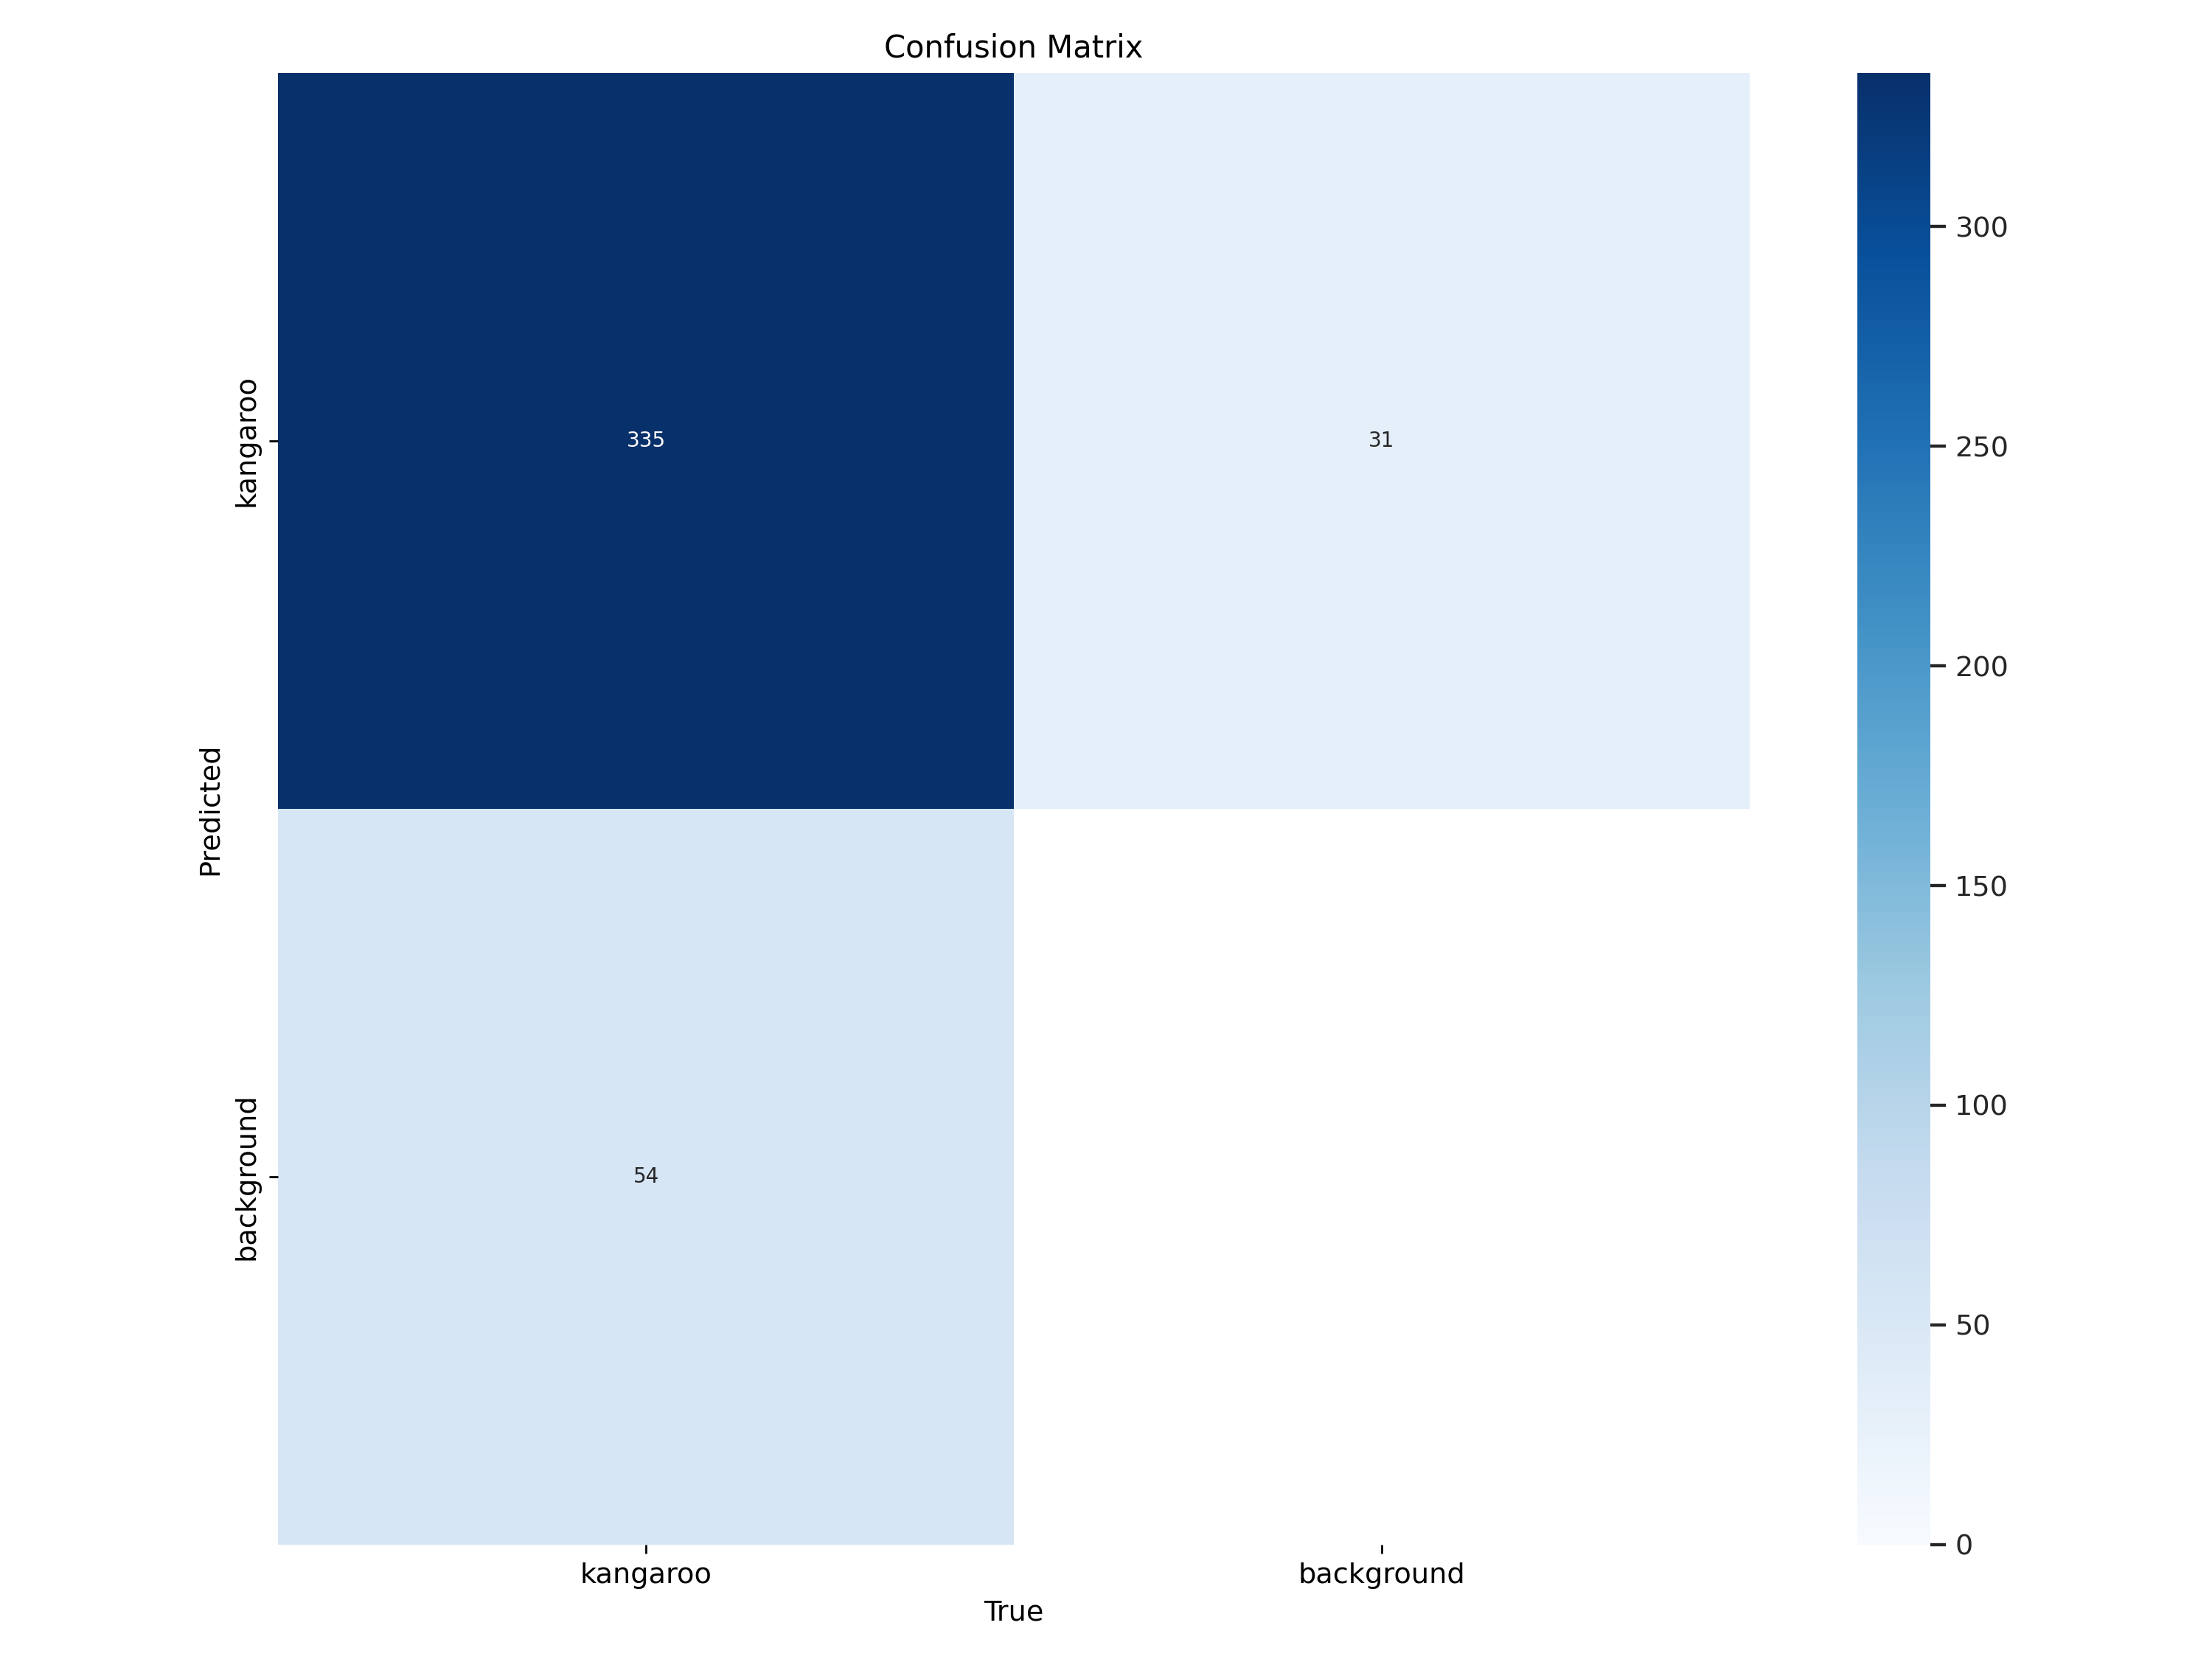

In [ ]:
import os
from IPython.display import display, Image

HOME = os.getcwd()
print(HOME)

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

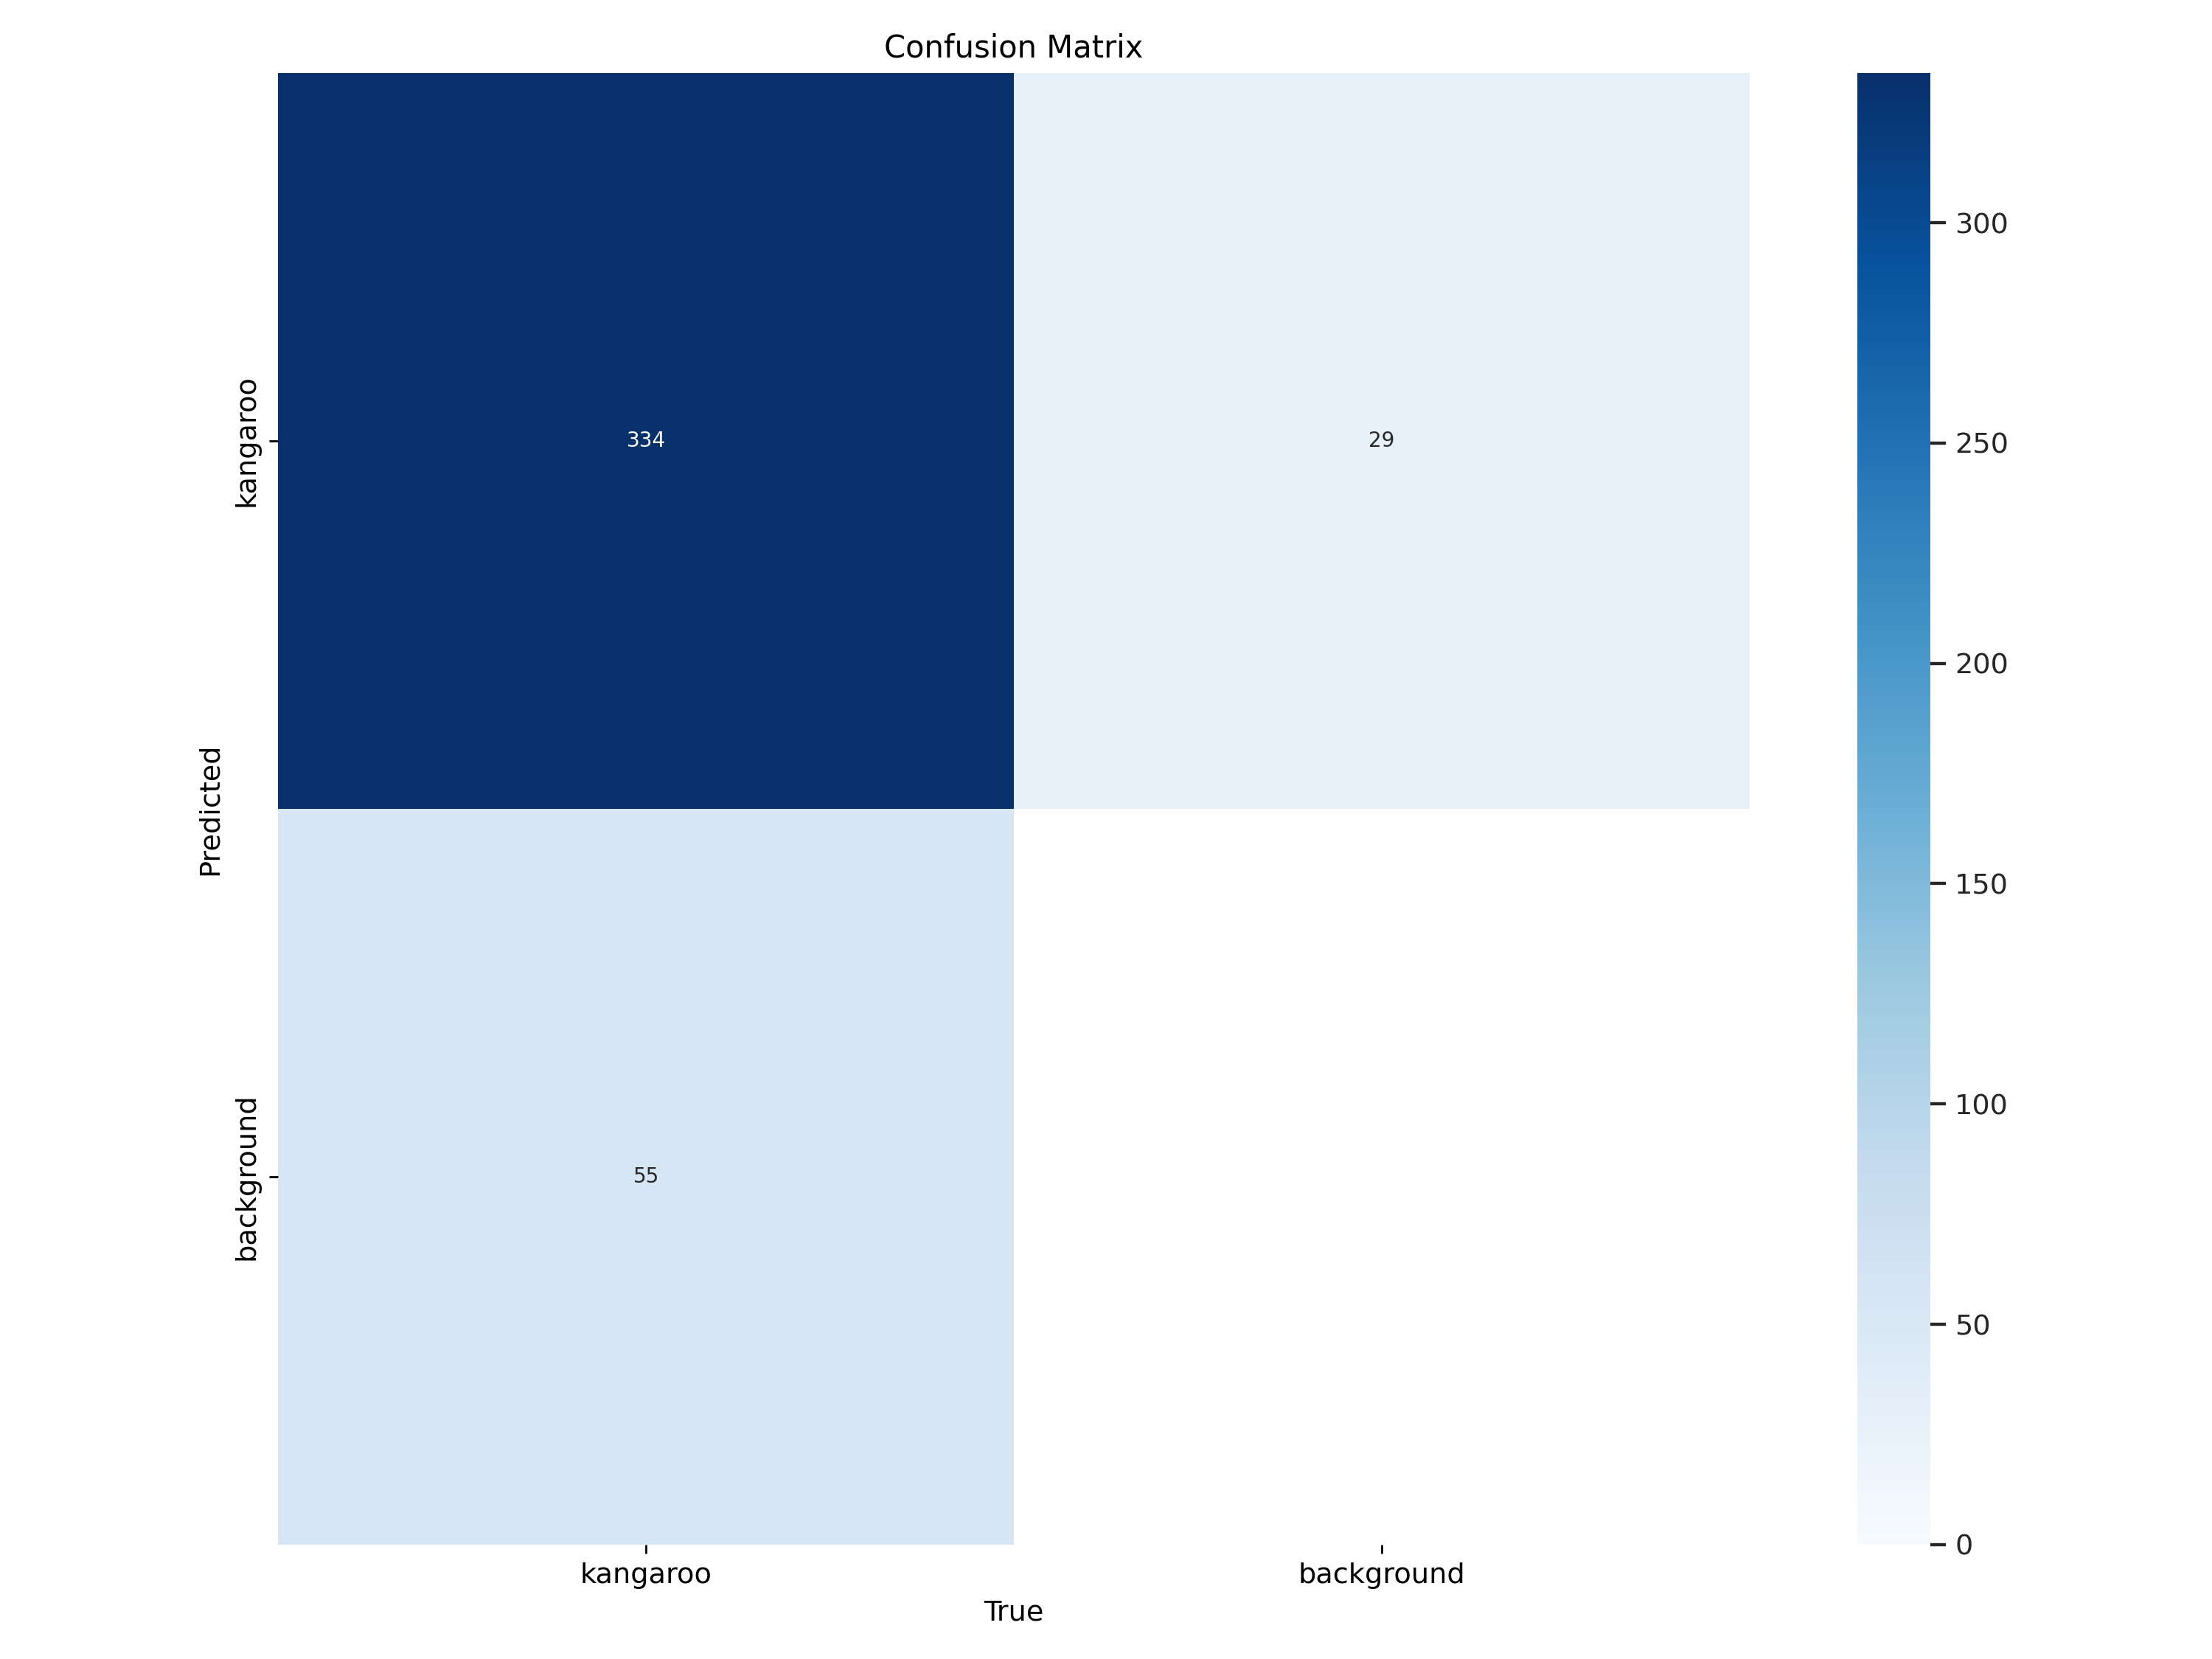

In [ ]:
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

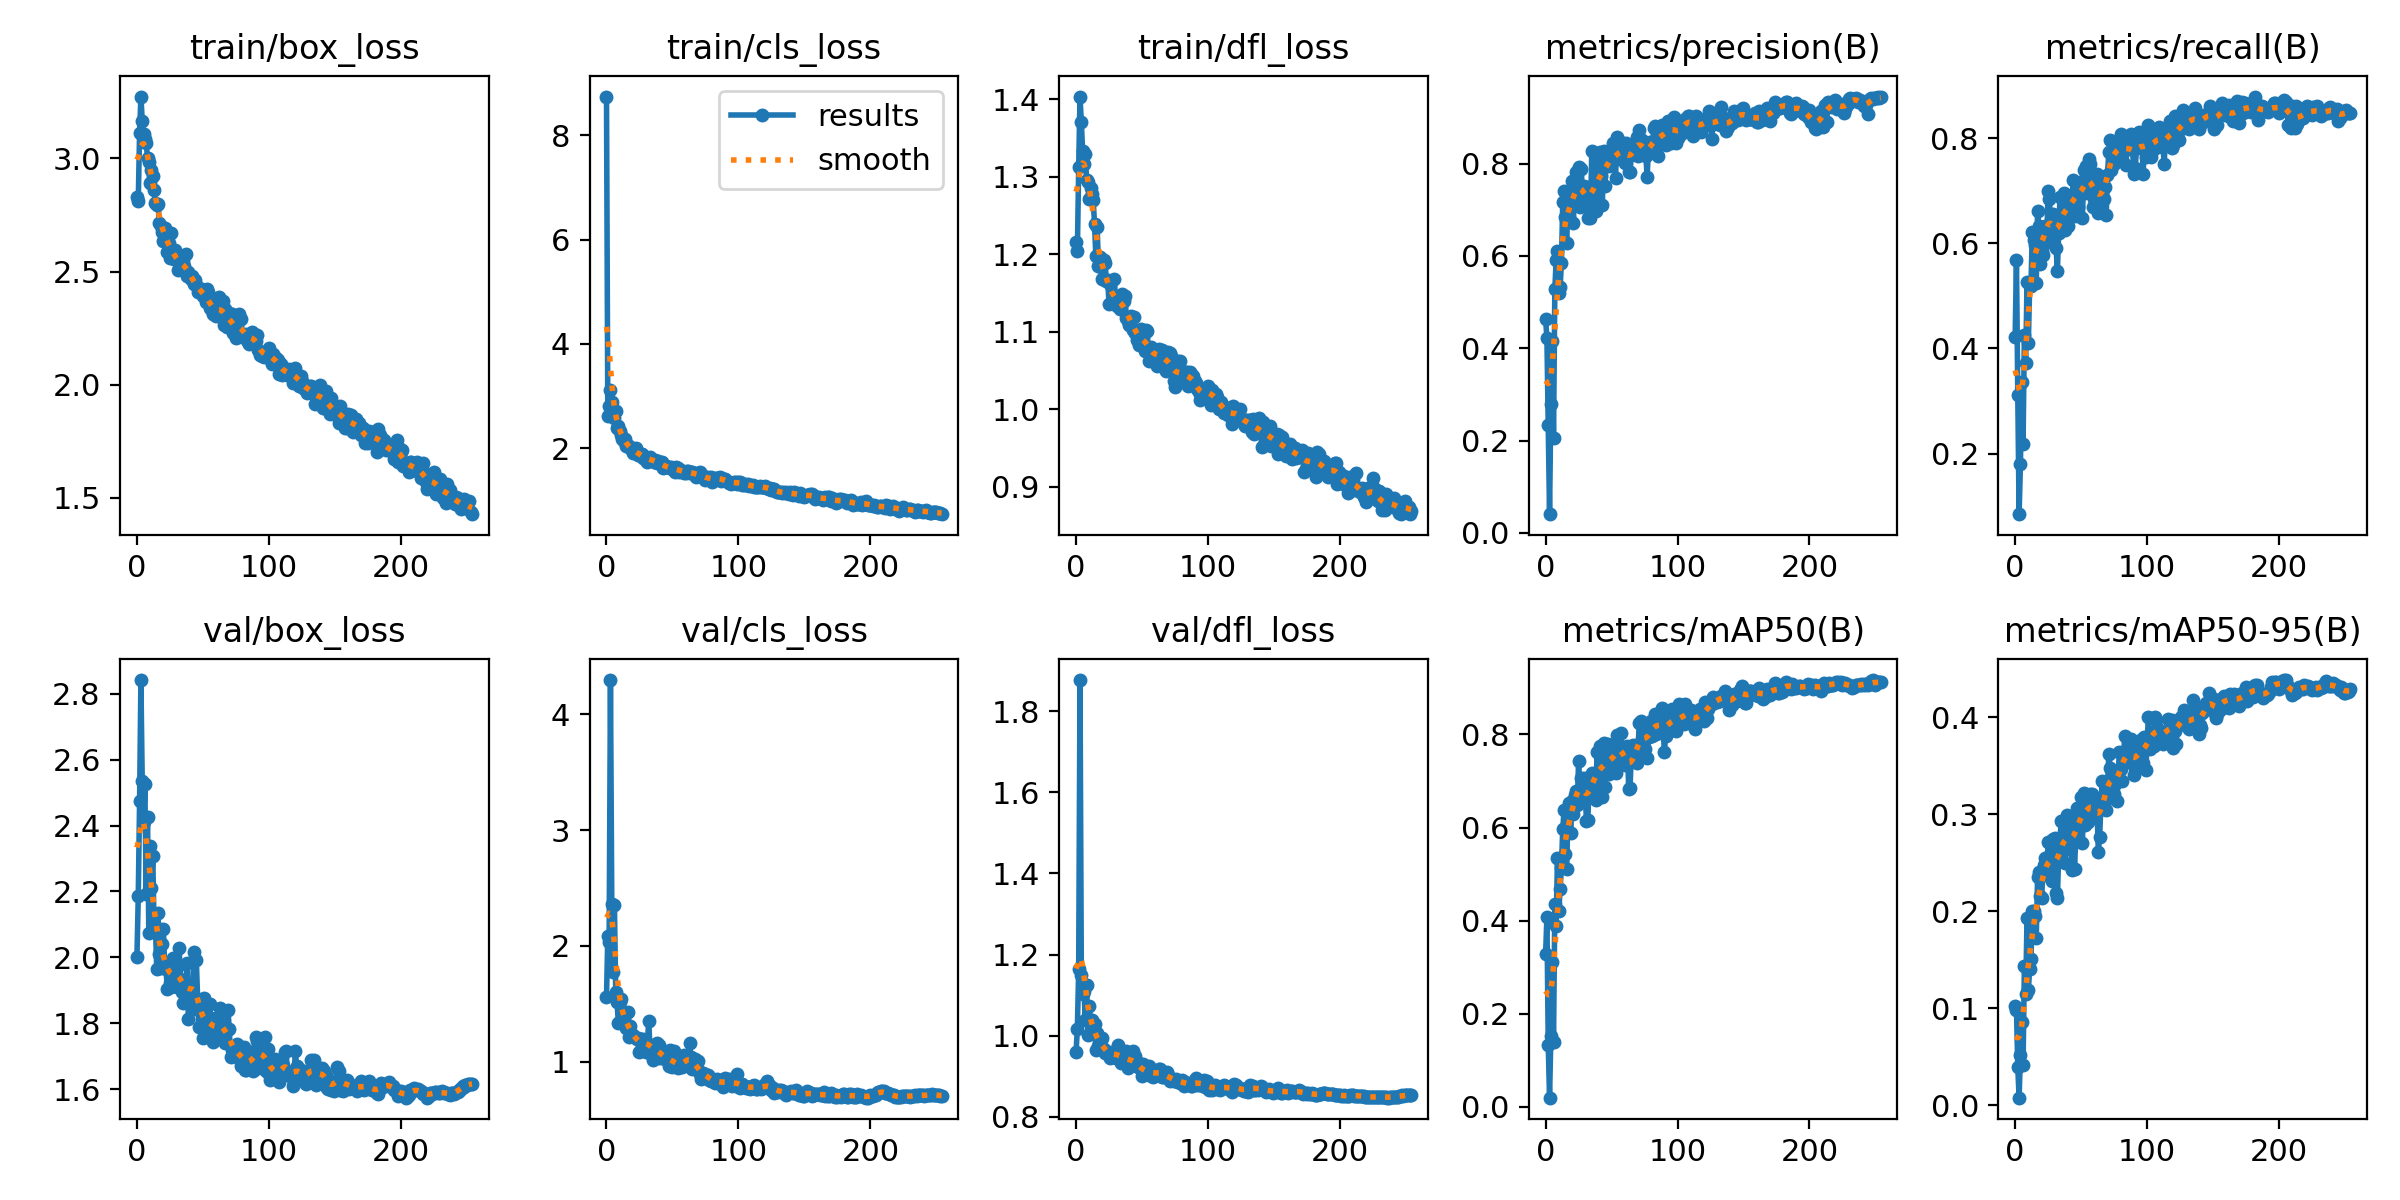

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.126 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

image 1/65 /content/dots-detector-1/test/images/117b_jpg.rf.55897b5a4d62307dbac50186a59e06c6.jpg: 640x640 (no detections), 15.4ms
image 2/65 /content/dots-detector-1/test/images/120c_jpg.rf.fc295a45063cb8dea972dde08fa2d4cd.jpg: 640x640 (no detections), 15.2ms
image 3/65 /content/dots-detector-1/test/images/130c_jpg.rf.545594584f06ab2b8edb83ad5e41714b.jpg: 640x640 (no detections), 15.3ms
image 4/65 /content/dots-detector-1/test/images/134b_jpg.rf.a4bc1a16460c61dfa58922e434b727ed.jpg: 640x640 (no detections), 15.3ms
image 5/65 /content/dots-detector-1/test/images/136c_jpg.rf.d7f8a18c7470ef026eba0ddc49c690d8.jpg: 640x640 (no detections), 15.2ms
image 6/65 /content/dots-detector-1/test/images/142c_jpg.rf.173bd2f3fa9540b35810dff0852ad93a.jpg: 640x640 (no detections), 15.2ms
image 7/65 /content/dots-detector-1/test/images/143

In [ ]:
#!ls {HOME}/runs/detect/predict/
!zip -r exp1_test_predictions.zip {HOME}/runs/detect/predict/
from google.colab import files
files.download('/content/exp1_test_predictions.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(f'{HOME}/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>